In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
winequality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = winequality.data.features
y = winequality.data.targets

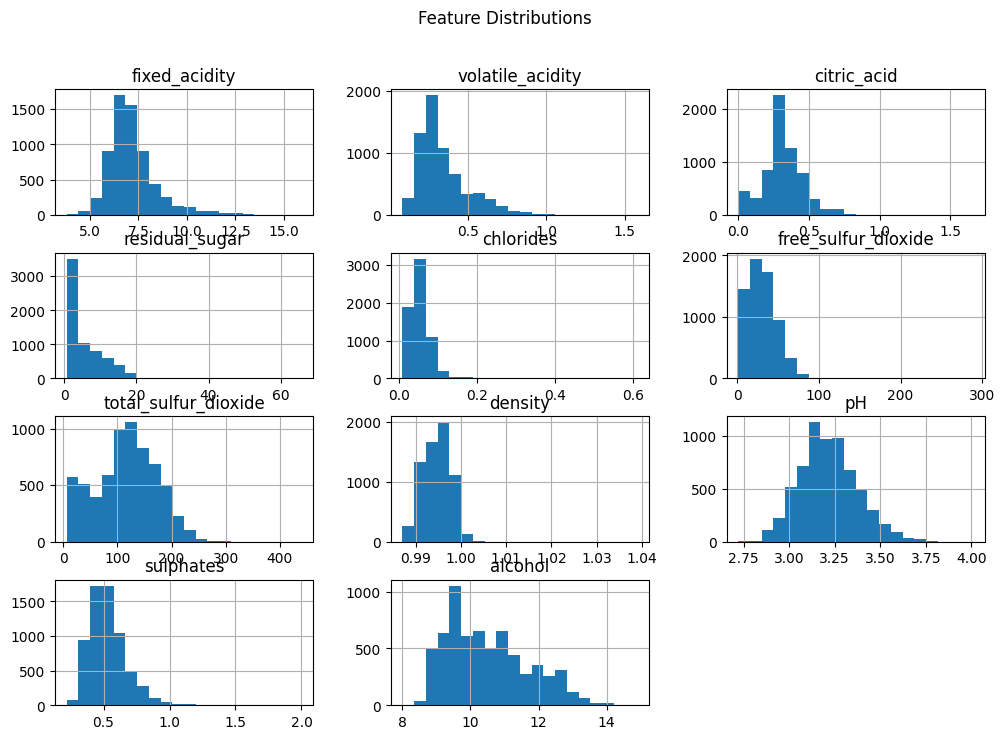

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

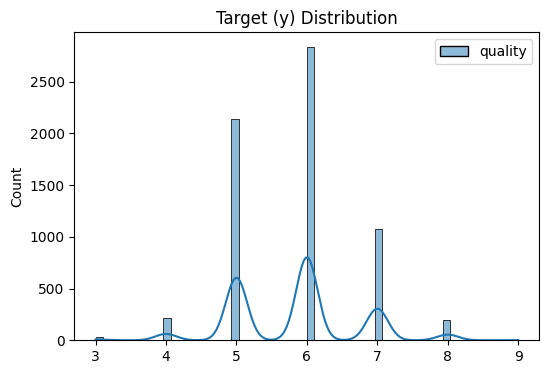

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

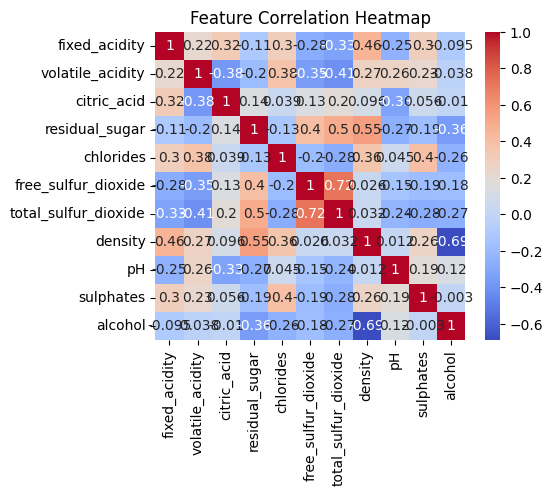

In [7]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X = X.values.astype(float)
y = np.array(y).astype(np.float32).reshape(-1)

In [9]:
ndpost=1000
nskip=1000
n_trees=5

In [10]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.157075                 1.088118             1.738556   
1                  1.245002                 1.176146             1.369629   
2                  1.133118                 1.109590             1.383734   
3                  1.089810                 1.255123             1.655025   
4                  1.142456                 1.150110             1.951703   
5                  1.181712                 1.139452             2.034961   
6                  1.087787                 1.118401             1.548998   
7                  1.171885                 1.237603             1.627651   
8                  1.307315                 1.113207             1.498833   
9                  1.116706                 1.228450             1.102102   
mean               1.163287                 1.161620             1.591119   
std                0.068707              

In [11]:
rhat_df.to_csv("results/real2_WineQuality_rhat.csv", index=False)

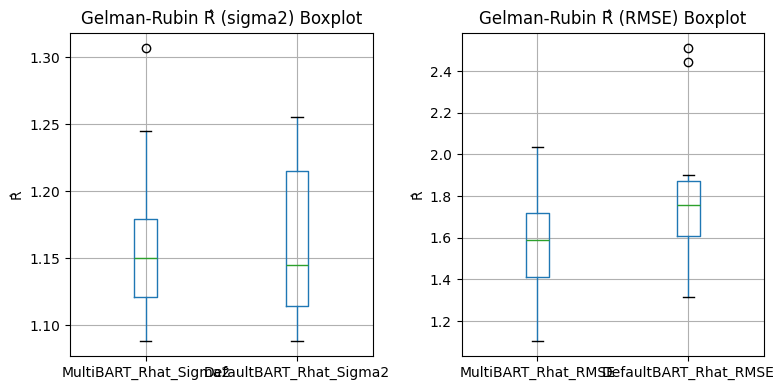

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 00:39:33,380:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 00:39:33,905:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 00:39:34,249:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.514585  0.509325  0.550780  0.444898  0.500438
1      0.471592  0.491983  0.513288  0.436751  0.472035
2      0.505868  0.534546  0.544137  0.455434  0.502713
3      0.476650  0.505036  0.523404  0.431114  0.477811
4      0.486789  0.507001  0.521488  0.459225  0.479969
5      0.487662  0.504172  0.519467  0.461169  0.495381
6      0.500277  0.511252  0.528454  0.465231  0.497222
7      0.484809  0.478509  0.517588  0.454892  0.479738
8      0.454226  0.471995  0.491987  0.406425  0.450200
9      0.516532  0.552119  0.565580  0.526474  0.530905
mean   0.489899  0.506594  0.527617  0.454161  0.488641
std    0.019735  0.023783  0.020945  0.030961  0.021776



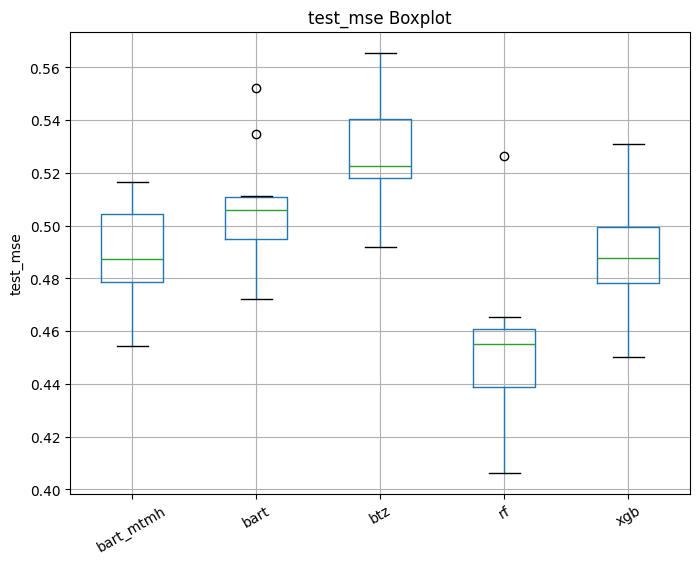

train_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.449019  0.458910  0.496377  0.100361  0.392174
1      0.439263  0.467736  0.492691  0.098974  0.403924
2      0.437311  0.465427  0.473830  0.095353  0.388445
3      0.444001  0.469951  0.502679  0.106084  0.401570
4      0.444320  0.462810  0.483534  0.100271  0.395045
5      0.446268  0.459922  0.494039  0.097348  0.406831
6      0.444553  0.456689  0.483790  0.094425  0.394739
7      0.441460  0.456586  0.486686  0.100107  0.392042
8      0.457641  0.474661  0.502786  0.105386  0.405680
9      0.430807  0.453781  0.470563  0.097143  0.383982
mean   0.443464  0.462647  0.488698  0.099545  0.396443
std    0.007162  0.006696  0.011066  0.003845  0.007726



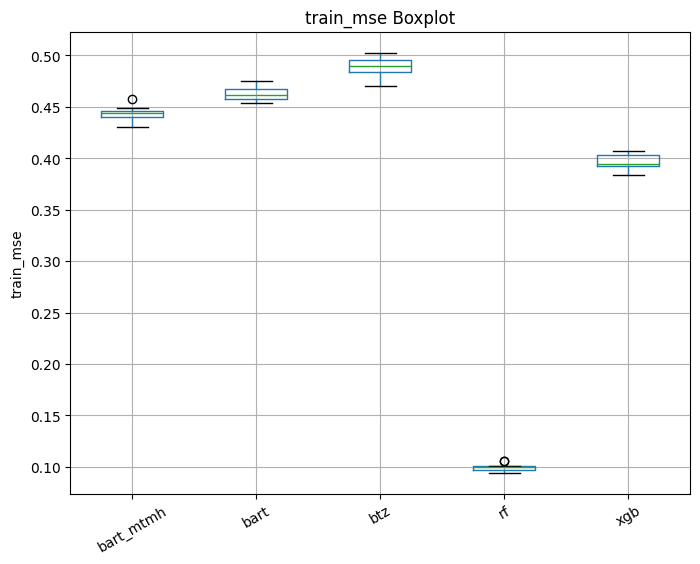

pi_length:
      bart_mtmh      bart       btz
0      2.644748  2.704197  2.859442
1      2.658526  2.738469  2.837953
2      2.649287  2.698302  2.851001
3      2.671968  2.732243  2.849787
4      2.672975  2.676638  2.831829
5      2.651277  2.699836  2.857798
6      2.632410  2.683777  2.806545
7      2.666753  2.710250  2.872131
8      2.702751  2.765246  2.893392
9      2.615740  2.683468  2.819861
mean   2.656643  2.709243  2.847974
std    0.024079  0.028147  0.025287



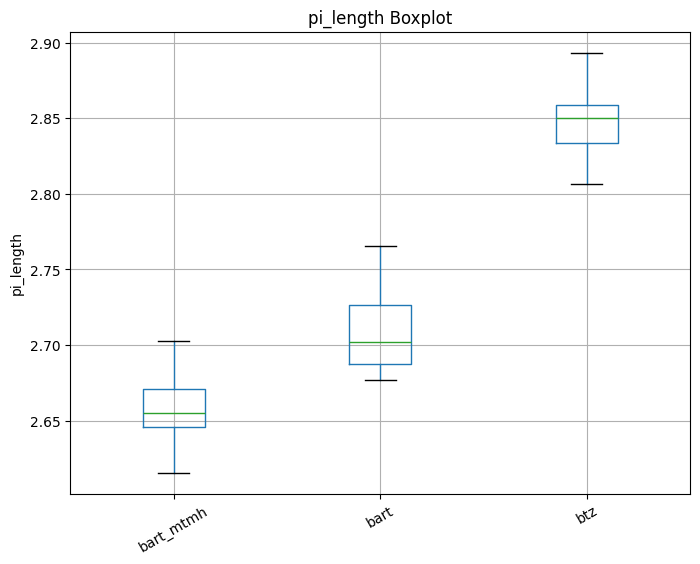

coverage:
      bart_mtmh      bart       btz
0      0.933538  0.944000  0.945846
1      0.944615  0.947692  0.947077
2      0.939692  0.929231  0.942769
3      0.942769  0.936000  0.937846
4      0.944615  0.935385  0.944000
5      0.937231  0.939077  0.946462
6      0.937846  0.931077  0.944615
7      0.940308  0.942154  0.947692
8      0.951385  0.947077  0.952615
9      0.928000  0.924923  0.935385
mean   0.940000  0.937662  0.944431
std    0.006482  0.007719  0.004932



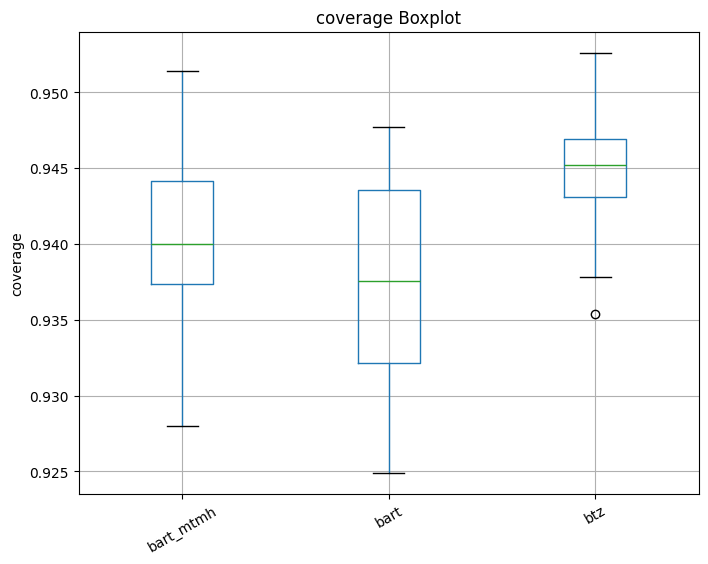

train_time:
      bart_mtmh      bart        btz        rf       xgb
0     14.258354  1.766378  11.627640  0.206336  0.048653
1     17.458298  1.795571  11.216184  0.207373  0.047088
2     16.137583  1.760783  10.840361  0.209421  0.050078
3     14.734709  1.740712  10.505553  0.205865  0.048389
4     14.123652  1.739858  10.746716  0.220608  0.050458
5     13.496431  1.782874   6.555160  0.201614  0.015257
6     12.138515  1.798268   6.870870  0.201288  0.018602
7     12.945026  1.863251   6.923555  0.202982  0.015457
8     13.304217  1.809996   7.008324  0.211788  0.015424
9     16.410571  2.177505   7.052539  0.200918  0.015845
mean  14.500736  1.823520   8.934690  0.206819  0.032525
std    1.692145  0.129613   2.187322  0.006058  0.017345



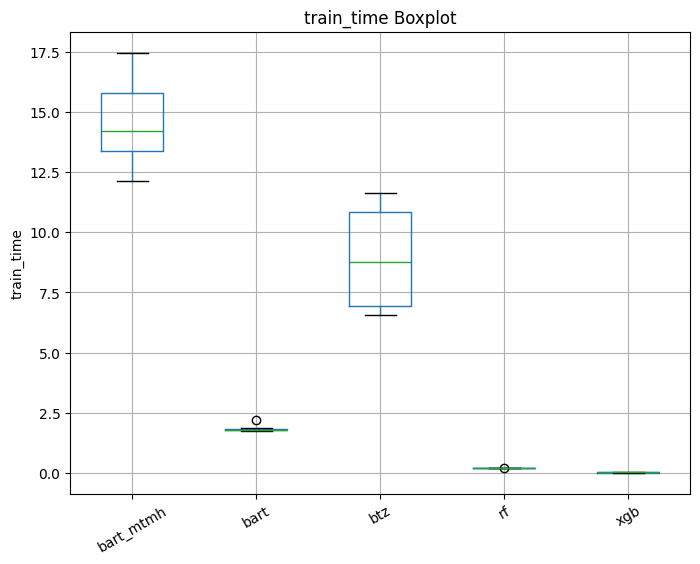

In [13]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=5)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [14]:
for k, v in mse_results.items():
    csv_name = f"results/real2_WineQuality_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [15]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real2_WineQuality_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real2_WineQuality_tries.csv", index=False)

In [16]:
import pandas as pd
df = pd.read_csv("results/real2_WineQuality_tries.csv")
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE  Test_MSE  Coverage  Train_Time
0            1     1.085067   1.932630  0.502402  0.940985    4.735389
1            5     1.131051   1.792778  0.499877  0.936923    9.482449
2           10     1.163287   1.591119  0.493093  0.939200   14.998558
3           50     1.134238   1.715755  0.493762  0.935569   52.954093
4          100     1.196534   1.466738  0.494525  0.933354   97.031981
